## Importe

In [1]:
from experiment_manager import Corpus, Corpus_RegexpTokenizer, Corpus_BurrowsDistance, Experiment

## Einleitung

Dies ist eine kleine Einführung in die entwickelte Software-Architektur. Deren Vorteil könnte darin bestehen, dass man mit dem ganzen Korpus arbeitet, was die ewigen Iterationen durch Schleifen erspart.
Als Datengrundlage fungiert hierbei eine kleine Sammlung von 7 deutschsprachigen Texten, die von Chat-Gpt generiert wurde. [Link](https://chat.openai.com/share/10f5f273-15d0-440f-9437-a0152340da6a).

## 1. Arbeiten mit Klassen

> Es ist möglich, mit Klassen und deren Methoden zu außerhalb der Experimente arbeiten

### 1.1 Lade Korpus

In [2]:
tomash_corpus = Corpus('chat_gpt_corpus', 'documents') # links: Name des Korpus, rechts: Pfad zum Corpus
print(tomash_corpus.name)
tomash_corpus.get_metadata(save_json=False)

chat_gpt_corpus


{'Text 1': {'title': 'Biodiversität', 'file': 'Biodiversität.txt'},
 'Text 2': {'title': 'Globale Wirtschaft', 'file': 'Globale Wirtschaft.txt'},
 'Text 3': {'title': 'Konsum', 'file': 'Konsum.txt'},
 'Text 4': {'title': 'Nachhaltigkeit', 'file': 'Nachhaltigkeit.txt'},
 'Text 5': {'title': 'Naturschutz', 'file': 'Naturschutz.txt'},
 'Text 6': {'title': 'Umweltschutz', 'file': 'Umweltschutz.txt'},
 'Text 7': {'title': 'Wirtschaft', 'file': 'Wirtschaft.txt'}}

In [3]:
load_corpus = tomash_corpus.load()

### 1.2 Tokenisierung

In [4]:
tokenizer = Corpus_RegexpTokenizer(lowercased=True, stop_words=True)
tokenized_corpus = tokenizer.tokenize_corpus(load_corpus) # Output: Dictionary mit Titeln als Schlüssel und Listen der Tokens als Werte

### 1.3 Distance Matrix

> Hierbei handelt es sich um die Klasse `Corpus_BurrowsDistance`. Alternativ können weitere ähnlichen Klassen erzeugt werden

In [5]:
corpus_burrows = Corpus_BurrowsDistance(corpus=tokenized_corpus, mfw=20, distance='cosine')

In [6]:
corpus_burrows.vectorize()

,Title,wirtschaft,bedeutung,schutz,unserer,umwelt,entscheidend,entscheidungen,art,vielfalt,...,gemeinsame,stärker,internationale,chancen,herausforderungen,seite,ausgewogene,bedeutet,treffen,einfluss
0,Biodiversität,-0.780865,1.004732,0.967264,0.894223,0.894223,-0.783917,-0.796772,1.46385,1.396724,...,1.774786,-0.569803,-0.377964,-0.579239,-0.569803,-0.377964,-0.579239,-0.584324,-0.581202,-0.576817
1,Globale Wirtschaft,1.398373,-0.800229,-0.800634,-0.796378,-0.796378,0.665590,-0.796772,-0.58554,-0.585114,...,1.096191,1.025645,2.267787,1.194680,1.025645,2.267787,1.194680,-0.584324,-0.581202,-0.576817
2,Konsum,1.105014,-0.800229,-0.800634,1.284361,1.284361,-0.783917,1.262031,-0.58554,-0.585114,...,-0.574195,-0.569803,-0.377964,-0.579239,-0.569803,-0.377964,-0.579239,1.572364,1.663441,1.739906
3,Nachhaltigkeit,-0.780865,1.004732,-0.800634,-0.796378,-0.796378,-0.783917,0.876006,1.46385,-0.585114,...,-0.574195,-0.569803,-0.377964,-0.579239,-0.569803,-0.377964,-0.579239,-0.584324,1.242571,-0.576817
4,Naturschutz,-0.780865,-0.800229,1.085124,1.006929,1.006929,1.390344,-0.796772,-0.58554,1.528846,...,-0.574195,1.823369,-0.377964,-0.579239,1.823369,-0.377964,-0.579239,-0.584324,-0.581202,-0.576817
5,Umweltschutz,-0.780865,1.191452,1.150150,-0.796378,-0.796378,-0.783917,1.049051,-0.58554,-0.585114,...,-0.574195,-0.569803,-0.377964,-0.579239,-0.569803,-0.377964,-0.579239,1.349258,-0.581202,-0.576817
6,Wirtschaft,0.620074,-0.800229,-0.800634,-0.796378,-0.796378,1.079735,-0.796772,-0.58554,-0.585114,...,-0.574195,-0.569803,-0.377964,1.701514,-0.569803,-0.377964,1.701514,-0.584324,-0.581202,1.144177


In [7]:
corpus_burrows.distance_matrix()

,Biodiversität,Globale Wirtschaft,Konsum,Nachhaltigkeit,Naturschutz,Umweltschutz,Wirtschaft
Biodiversität,0.000000,1.382173,1.293376,0.783369,0.917844,1.055049,1.514864
Globale Wirtschaft,1.382173,0.000000,1.348716,1.414387,1.025642,1.418011,0.662530
Konsum,1.293376,1.348716,0.000000,1.039618,1.234862,0.982031,1.089123
Nachhaltigkeit,0.783369,1.414387,1.039618,0.000000,1.490053,0.758073,1.283890
Naturschutz,0.917844,1.025642,1.234862,1.490053,0.000000,1.250143,1.226809
Umweltschutz,1.055049,1.418011,0.982031,0.758073,1.250143,0.000000,1.269531
Wirtschaft,1.514864,0.662530,1.089123,1.283890,1.226809,1.269531,0.000000


C:\Users\tomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


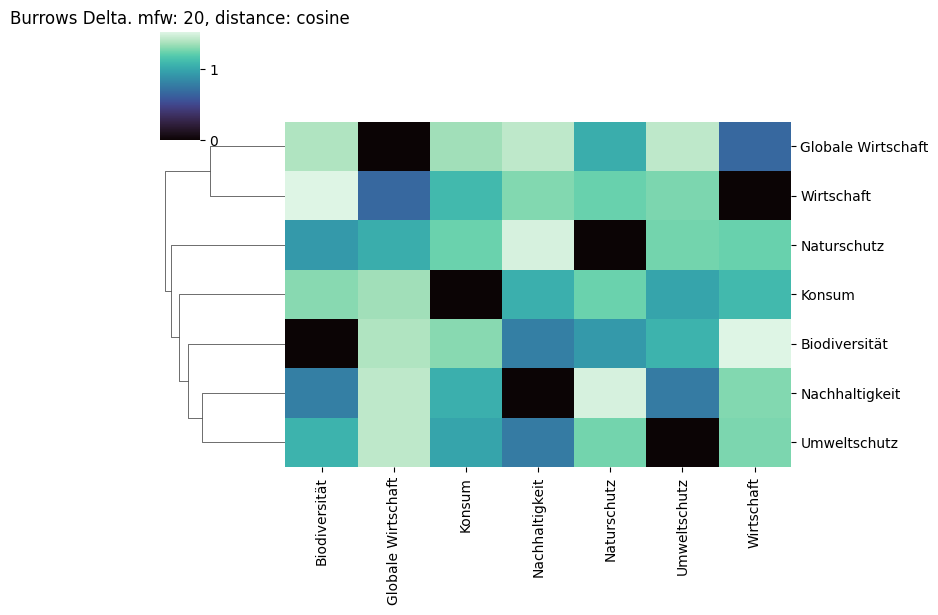

In [8]:
corpus_burrows.plot_dendrogram()

## 2. Durchführung der Experimente

**Notiz**:
`(self, name:str, corpus_path:str, tokenizer:str,
                 stop_words:bool, lowercased:bool,
                 distance_methods:list, mfw_range:list,
                 n_cluster:int)`

Ein Experiment -> ein Klassenbjekt.
Vorgehen: Zuerst wird ein Objekt mit nötigen Hyperparametern erzeugt, dann werden die Methoden `run()` und `save_metadata()` (optional) ausgerufen.
Die Ergebnisse werden im Ordner gespeichert. Dort sind in diesem Sinne die Visualisierung und Ergebnistabelle für jedes Experiment zu finden.
Derzeit beruht das Vorgehen auf hierarchischen Clusterverfahren, d.h. Dendrogrammen. Die Qualität des Clusterings wird anhand der Silhouette-Werte gemessen,
wobei die höheren Werte bessere Qualität des Clusterings bedeuten.
*Wichtig*: Die Ergebnisse, welche gezeigt werden, dienen als eine Demonstration. Des Weiteren wurden die Formeln für **Burrows Delta** aus folgender Quelle entnommen: (Link)[https://www.zfdg.de/2017_006]

In [9]:
experiment_1 = Experiment(experiment_name='experiment1', corpus_name='example_gpt_generated_corpus',
                          corpus_path='documents', tokenizer='regexp', stop_words=True, lowercased=True,
                          distance_methods=['cosine', 'euclidean', 'manhattan'], mfw_range=[10, 40], n_cluster=3)

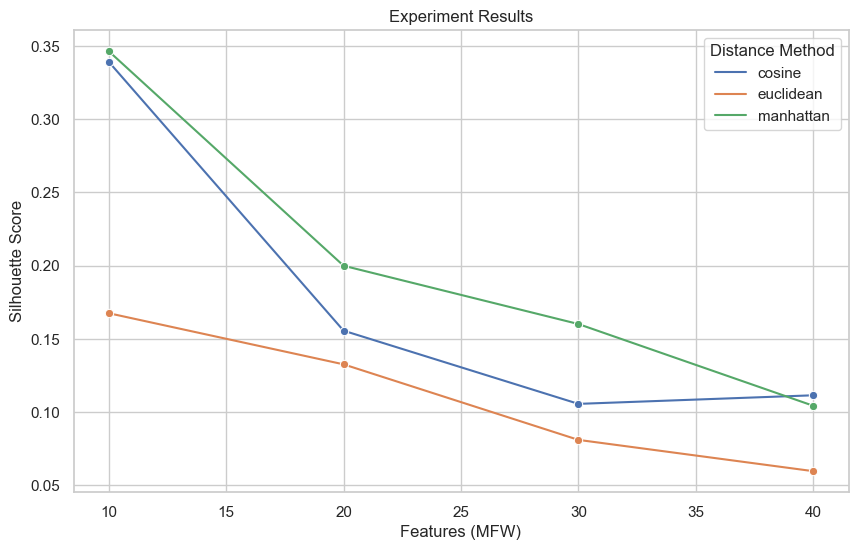

,Distance Method,MFW,Silhouette Score
0,cosine,10,0.339278
1,cosine,20,0.155570
2,cosine,30,0.105564
3,cosine,40,0.111424
4,euclidean,10,0.167501
5,euclidean,20,0.132568
6,euclidean,30,0.080959
7,euclidean,40,0.059588
8,manhattan,10,0.346509
9,manhattan,20,0.199929


In [10]:
experiment_1.run()

In [11]:
experiment_1.save_metadata()

{'Experiment': 'experiment1',
 'Corpus': 'example_gpt_generated_corpus',
 'Tokenizer': 'regexp',
 'Lowercase': True,
 'Stop words': True,
 'MFW': '10, 40',
 'Distance Methods': 'cosine, euclidean, manhattan',
 'Predefined Clusters': 3,
 'Time': '29.09.2023, 23:46:29'}